# Latin Hypercube Design

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

<https://doi.org/10.1016/0378-3758(94)90115-5>

<https://reader.elsevier.com/reader/sd/pii/0378375894901155?token=3299E7CE82FACF3298BD7056DD231F5740237919F58DCD908D6393AC306F7580BF8A32A4445E36EA24855DA1B72B7898&originRegion=eu-west-1&originCreation=20221108183047>

In [2]:
from typing import Tuple, Callable
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import GPy
from GPy.kern import Linear, RBF
from GPy.models import GPRegression
from emukit.core import ParameterSpace, ContinuousParameter
from emukit.core.initial_designs.latin_design import LatinDesign
from sithom.plot import plot_defaults, label_subplots
from sithom.time import timeit
from sithom.place import Point
from sithom.misc import in_notebook
from src.constants import DATA_PATH, FIGURE_PATH
from src.conversions import si_ify, knots_to_ms
from src.constants import NEW_ORLEANS, DATA_PATH, NO_BBOX

 /Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning:Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message


In [4]:
?LatinDesign

In [5]:
from pyDOE import lhs

In [30]:
lhdog = lhs(2, samples=1000)

In [31]:
lhdmm = lhs(2, samples=1000, criterion="maximin")

In [28]:
lhd

array([[0.27835954, 0.64681908],
       [0.99023692, 0.02135061],
       [0.81794927, 0.72048746],
       ...,
       [0.11889118, 0.9172845 ],
       [0.61345428, 0.35208793],
       [0.7796904 , 0.77931773]])

new candidate solution found with max,abs corrcoef = 1.0


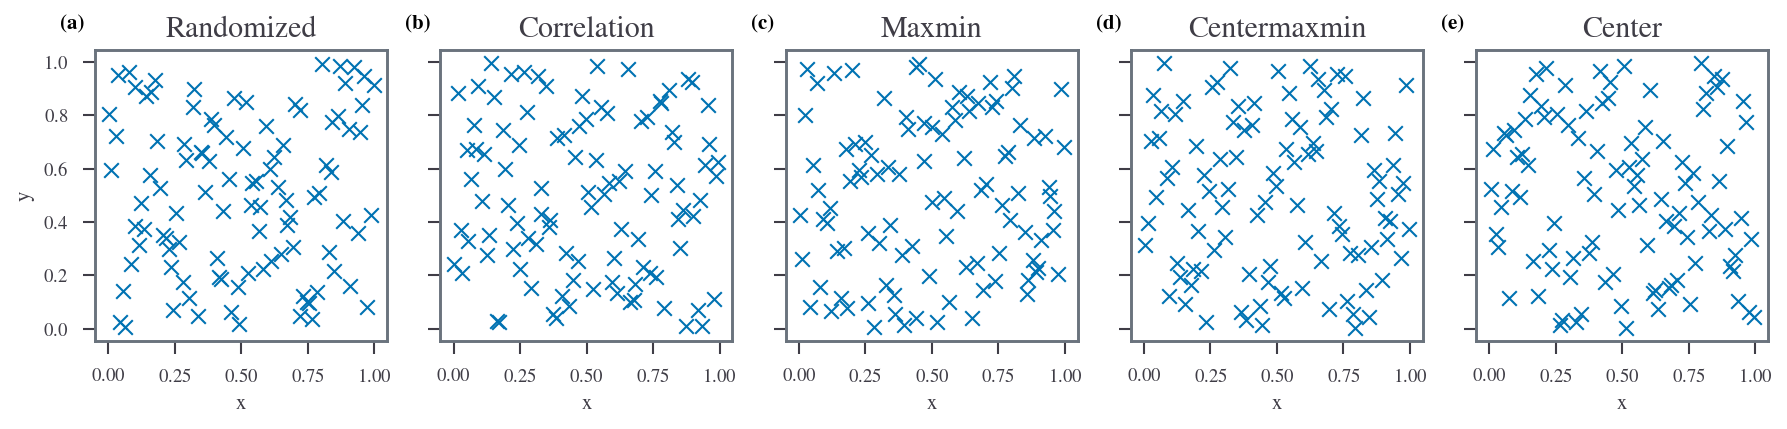

In [60]:
from sithom.plot import plot_defaults, label_subplots

plot_defaults()
np.random.seed(2)
samples = 100

lhdmm = lhs(2, samples=samples, criterion="maximin")
lhdco = lhs(2, samples=samples, criterion="corr")
lhdcm = lhs(2, samples=samples, criterion="cm")
lhdc = lhs(2, samples=samples, criterion="c")
lhdog = lhs(2, samples=samples)

fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharex=True, sharey=True)
axs[0].scatter(lhdog[:, 0], lhdog[:, 1], marker="x")
axs[2].scatter(lhdmm[:, 0], lhdmm[:, 1], marker="x")
axs[1].scatter(lhdco[:, 0], lhdco[:, 1], marker="x")
axs[3].scatter(lhdcm[:, 0], lhdcm[:, 1], marker="x")
axs[4].scatter(lhdc[:, 0], lhdc[:, 1], marker="x")

axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
axs[1].set_xlabel("x")
axs[2].set_xlabel("x")
axs[3].set_xlabel("x")
axs[4].set_xlabel("x")

axs[0].set_title("Randomized")
axs[2].set_title("Maxmin")
axs[1].set_title("Correlation")
axs[3].set_title("Centermaxmin")
axs[4].set_title("Center")

label_subplots(axs, override="outside")

In [18]:
lhd[:, 1].shape

(100,)

In [44]:
?lhs